## Anomaly Detection

This notebook is used for anomaly detection using the Anomalib library and MVTec Dataset. The model used is the Efficient Ad model whose backbone is of EfficientNet.

In [1]:
# Uninstall the conflicting packages
!pip uninstall -y anomalib ollama

# Reinstall anomalib without the faulty dependencies
!pip install anomalib[full] --extra-index-url https://pypi.org/simple --no-deps

# Manually install missing dependencies except 'ollama'
!pip install torch torchvision torchaudio pytorch-lightning
!pip install opencv-python-headless scikit-learn


Looking in indexes: https://pypi.org/simple, https://pypi.org/simple
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.6/486.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/81

In [2]:
import anomalib
print(anomalib.__version__)

1.2.0


In [3]:
import torch
import torchvision
import torchaudio
import pytorch_lightning as pl
print(f"PyTorch version: {torch.__version__}")
print(f"TorchVision version: {torchvision.__version__}")
print(f"TorchAudio version: {torchaudio.__version__}")
print(f"PyTorch Lightning version: {pl.__version__}")
import cv2
import matplotlib
import sklearn

print(f"OpenCV version: {cv2.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

PyTorch version: 2.5.1+cu124
TorchVision version: 0.20.1+cu124
TorchAudio version: 2.5.1+cu124
PyTorch Lightning version: 2.5.0.post0
OpenCV version: 4.10.0
Matplotlib version: 3.10.0
Scikit-Learn version: 1.6.1


In [4]:
!pip install matplotlib==3.7.1 # Install matplotlib 3.7.1, previous version may not work correctly
# import matplotlib
# matplotlib.use('agg')  # or 'Agg' depending on your system


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.


In [4]:
import matplotlib
print(f"Matplotlib version: {matplotlib.__version__}")


Matplotlib version: 3.7.1


In [5]:
import sys
print("Python version")
print(sys.version)
print("Version info.")
print(sys.version_info)


Python version
3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Version info.
sys.version_info(major=3, minor=11, micro=11, releaselevel='final', serial=0)


In [ ]:
# Import required packages
from anomalib.data import MVTec
from anomalib.engine import Engine
from anomalib.models import EfficientAd

/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


# Training

In [ ]:

# 2. Create a dataset
# MVTec is a popular dataset for anomaly detection
datamodule = MVTec(
    root="./datasets/MVTec",  # Path to download/store the dataset
    # category="bottle",  # MVTec category to use
    category="metal_nut",
    train_batch_size=1,  # Number of images per training batch
    eval_batch_size=32,  # Number of images per validation/test batch
    num_workers=8,  # Number of parallel processes for data loading
)

# 3. Initialize the model
# EfficientAd is a good default choice for beginners
model = EfficientAd()


In [ ]:

# 4. Create the training engine
engine = Engine(max_epochs=5)  # Train for 5 epochs

# 5. Train the model
engine.fit(datamodule=datamodule, model=model)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
INFO: 
  | Name                  | 

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/anomalib/models/image/efficient_ad/lightning_model.py:98: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
/usr/local/lib/python3.11/dist-packages/torchv

Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 4/4 [00:08<00:00,  2.10s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]
INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


# Inference

In [ ]:
#  Perform inference on a trained model using the Anomalib Python API.


# 1. Import required modules
from pathlib import Path

from anomalib.data import PredictDataset


# 3. Prepare test data
# You can use a single image or a folder of images
dataset = PredictDataset(
    path=Path("./datasets/MVTec/metal_nut/test"),
    image_size=(256, 256),
)


In [ ]:

# 4. Get predictions
predictions = engine.predict(
    model=model,
    dataset=dataset,
    ckpt_path="/content/results/EfficientAd/MVTec/metal_nut/latest/weights/lightning/model.ckpt",
)


/usr/local/lib/python3.11/dist-packages/anomalib/engine/engine.py:391: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=model.de

Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
if predictions is not None:
    for i, prediction in enumerate(predictions[:5]):  # Print first 5 predictions
        print(f"Prediction {i+1}: {prediction.keys()}")


Prediction 1: dict_keys(['image', 'image_path', 'anomaly_maps', 'pred_scores', 'pred_labels', 'pred_masks', 'pred_boxes', 'box_scores', 'box_labels'])
Prediction 2: dict_keys(['image', 'image_path', 'anomaly_maps', 'pred_scores', 'pred_labels', 'pred_masks', 'pred_boxes', 'box_scores', 'box_labels'])
Prediction 3: dict_keys(['image', 'image_path', 'anomaly_maps', 'pred_scores', 'pred_labels', 'pred_masks', 'pred_boxes', 'box_scores', 'box_labels'])
Prediction 4: dict_keys(['image', 'image_path', 'anomaly_maps', 'pred_scores', 'pred_labels', 'pred_masks', 'pred_boxes', 'box_scores', 'box_labels'])
Prediction 5: dict_keys(['image', 'image_path', 'anomaly_maps', 'pred_scores', 'pred_labels', 'pred_masks', 'pred_boxes', 'box_scores', 'box_labels'])


In [ ]:
# 5. Access the results
if predictions is not None:
    for prediction in predictions:
        # Access the image, anomaly map, label, and score
        image = prediction["image"]

        # Check if 'anomaly_map' key exists before accessing it
        anomaly_map = prediction.get("anomaly_maps", None)

        pred_label = prediction["pred_labels"]
        pred_score = prediction["pred_scores"]

        # Print details, handling potential missing 'anomaly_map'
        print(f"Predicted Label: {pred_label}, Score: {pred_score}")
        if anomaly_map is not None:
            print("Anomaly map shape:", anomaly_map.shape) # Optional: print anomaly map shape
        else:
            print("Anomaly map not found in prediction.")

Predicted Label: tensor([True]), Score: tensor([0.6508])
Anomaly map shape: torch.Size([1, 1, 256, 256])
Predicted Label: tensor([True]), Score: tensor([0.5898])
Anomaly map shape: torch.Size([1, 1, 256, 256])
Predicted Label: tensor([True]), Score: tensor([0.5676])
Anomaly map shape: torch.Size([1, 1, 256, 256])
Predicted Label: tensor([True]), Score: tensor([0.5904])
Anomaly map shape: torch.Size([1, 1, 256, 256])
Predicted Label: tensor([True]), Score: tensor([0.5845])
Anomaly map shape: torch.Size([1, 1, 256, 256])
Predicted Label: tensor([True]), Score: tensor([0.6295])
Anomaly map shape: torch.Size([1, 1, 256, 256])
Predicted Label: tensor([True]), Score: tensor([0.5333])
Anomaly map shape: torch.Size([1, 1, 256, 256])
Predicted Label: tensor([True]), Score: tensor([0.5282])
Anomaly map shape: torch.Size([1, 1, 256, 256])
Predicted Label: tensor([True]), Score: tensor([0.5291])
Anomaly map shape: torch.Size([1, 1, 256, 256])
Predicted Label: tensor([True]), Score: tensor([0.6262]

# Testing

In [ ]:
ground_truths = []  # Store actual labels

dataloader = datamodule.test_dataloader()  # Assuming test_dataloader is available

for batch in dataloader:
    labels = batch["label"].numpy()  # Adjust based on your dataset structure
    ground_truths.extend(labels)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to a NumPy array
import numpy as np
predicted_labels = np.array([pred["pred_labels"][0] for pred in predictions])  # Extract first label from each prediction

# Compute Accuracy
accuracy = accuracy_score(ground_truths, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print(classification_report(ground_truths, predicted_labels))


Accuracy: 0.9043
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        22
           1       0.94      0.95      0.94        93

    accuracy                           0.90       115
   macro avg       0.85      0.84      0.84       115
weighted avg       0.90      0.90      0.90       115



In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support

# Extract anomaly scores
predicted_scores = np.array([pred["pred_scores"][0] for pred in predictions])  # Extract first score per sample

# Compute AUC-ROC
auc_score = roc_auc_score(ground_truths, predicted_scores)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Compute Precision, Recall, and F1-score (thresholding at 0.5)
threshold = 0.5  # Adjust if needed
binary_preds = (predicted_scores > threshold).astype(int)
precision, recall, f1, _ = precision_recall_fscore_support(ground_truths, binary_preds, average="binary")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


AUC-ROC Score: 0.9467
Precision: 0.9355, Recall: 0.9355, F1-Score: 0.9355


In [ ]:
import torch
from sklearn.metrics import jaccard_score

def calculate_iou(mask_pred, mask_gt):
    mask_pred = torch.tensor(mask_pred).flatten()
    mask_gt = torch.tensor(mask_gt).flatten()
    intersection = (mask_pred * mask_gt).sum()
    union = (mask_pred + mask_gt).sum()
    return (intersection / (union + 1e-8)).item()

# Compute IoU for first 10 predictions
iou_scores = [calculate_iou(pred["pred_masks"], gt) for pred, gt in zip(predictions[:10], ground_truths[:10])]
mean_iou = sum(iou_scores) / len(iou_scores)
print(f"Mean IoU: {mean_iou:.4f}")


Mean IoU: 0.0403


<ipython-input-15-3ad9b98adc1a>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask_pred = torch.tensor(mask_pred).flatten()


In [ ]:
%matplotlib inline

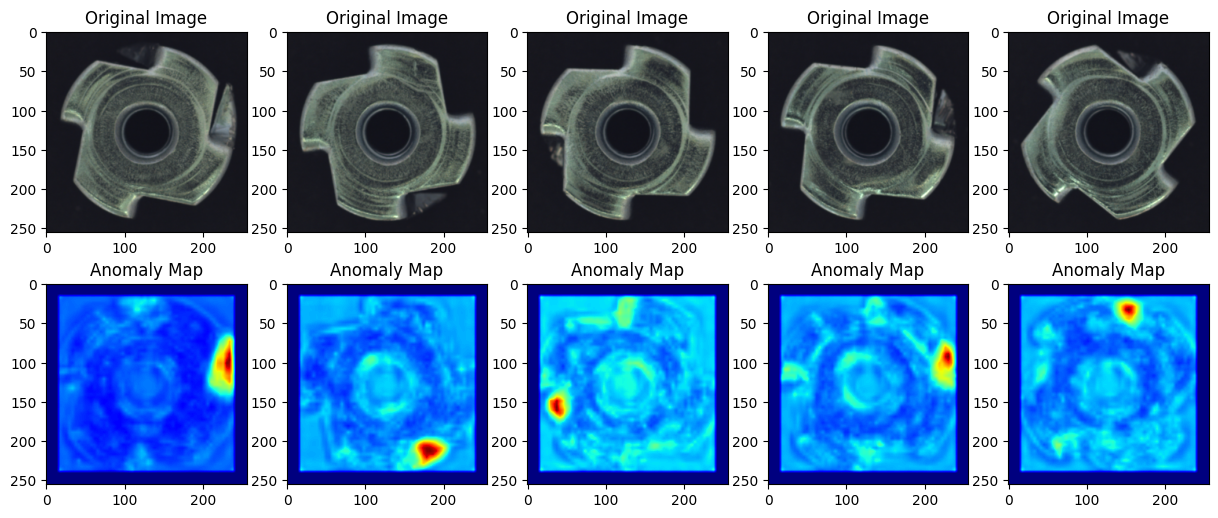

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    # Extract image and remove batch dimension
    image = predictions[i]["image"]
    image = np.squeeze(image)  # Remove batch dimension (1, 3, 256, 256) → (3, 256, 256)

    # If image has 3 channels, transpose to (256, 256, 3) for imshow
    if image.shape[0] == 3:
        image = np.transpose(image, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)

    # Convert anomaly map
    anomaly_map = predictions[i]["anomaly_maps"]
    anomaly_map = np.squeeze(anomaly_map)  # Remove unnecessary dimensions

    # Display original image
    axes[0, i].imshow(image)  # No need for cmap if image is RGB
    axes[0, i].set_title("Original Image")

    # Display anomaly map
    axes[1, i].imshow(anomaly_map, cmap="jet")
    axes[1, i].set_title("Anomaly Map")

plt.show()
